## Instructor Demo: Simulation of Stock Price Trajectory

This program executes a single simulation of stock price trajectory over the next `252` trading days (or year of trading) for `AAPL` stock, based on a normal probability distribution of historical average daily returns derived from the sample mean and standard deviation.

In [3]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv('../../../../.env')

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY_ENV")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY_ENV")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 5 Year's Worth of Data via API Call and Read in as DataFrame 

In [5]:
# Set the ticker
ticker = "AAPL"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2017-01-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-31", tz="America/New_York").isoformat()

# Set limit_rows to 1000 to retreive the maximum amount of rows
limit_rows = 1000
    
# Get 1 year's worth of historical data for AAPL
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

ticker_data.head()

C:\Users\dlpst\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:20: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


AAPL                                    
                              open    high     low     close    volume
time                                                                  
2018-02-12 00:00:00-05:00  158.480  163.89  157.51  162.7500  45978023
2018-02-13 00:00:00-05:00  161.950  164.75  161.65  164.3451  26023893
2018-02-14 00:00:00-05:00  163.045  167.54  162.88  167.3600  32197106
2018-02-15 00:00:00-05:00  169.790  173.09  169.00  173.0000  43517636
2018-02-16 00:00:00-05:00  172.360  174.82  171.77  172.4500  33864874

### Run the Monte Carlo Simulation

In [6]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_oneyear = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

In [7]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_oneyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\dlpst\OneDrive\Documents\UC_Berkeley_Blockchain_Bootcamp\GitHub\00_Module_Activities\Module_5\Class_2_Activities\05-Inst_Simulation_of_Stock_Price_Trajectory\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982851,1.045591,0.987458,1.016553,0.999856,1.003765,0.947083,0.992139,1.052188,0.965279,...,0.949995,1.008678,1.026181,1.048884,1.018157,0.971399,1.005514,0.993327,1.022198,0.999384
2,0.988551,1.066818,0.954135,1.004269,0.962540,1.051276,0.954604,0.988104,1.048186,0.987652,...,0.972425,1.016281,1.107910,1.099703,1.033356,0.955580,1.039621,0.996430,1.087626,1.027318
3,0.997577,1.032348,0.959220,1.033120,0.965530,1.039710,0.931002,0.927549,1.036411,0.999580,...,1.009003,1.045589,1.090045,1.100777,1.062962,0.915402,1.049073,1.060877,1.150978,1.039956
4,0.920900,0.982857,0.971604,1.010947,0.978769,1.011053,0.934846,0.935025,1.076391,1.011601,...,0.980311,1.045985,1.108135,1.121519,1.072339,0.901537,1.098554,1.064204,1.158693,1.018187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.188981,0.959924,3.755520,0.492769,2.269889,0.670244,1.660863,0.758707,1.460043,1.370312,...,0.527671,1.562501,2.236048,1.107024,0.449600,1.182342,1.434538,0.387355,1.470403,1.880367
249,1.235805,0.879749,4.021877,0.482386,2.196743,0.653309,1.624813,0.769267,1.369746,1.385101,...,0.547334,1.516378,2.246974,1.120920,0.458730,1.138033,1.459044,0.373262,1.495682,1.777942
250,1.342283,0.838542,3.914313,0.493254,2.286385,0.601278,1.612214,0.792205,1.356209,1.379580,...,0.523902,1.491258,2.311514,1.215497,0.459512,1.191446,1.453360,0.388450,1.500215,1.812192
251,1.352567,0.827539,3.744785,0.507403,2.197184,0.565793,1.581874,0.799422,1.313634,1.344163,...,0.505767,1.531749,2.291252,1.244274,0.474784,1.178214,1.468950,0.394010,1.535729,1.857106


### Plot the Simulated Daily Returns Trajectory for `AAPL` over the Next Year (252 Trading Days)

In [34]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_oneyear.simulated_return.mean(axis=1)),
    "median": list(MC_oneyear.simulated_return.median(axis=1)),
    "min": list(MC_oneyear.simulated_return.min(axis=1)),
    "max": list(MC_oneyear.simulated_return.max(axis=1))
}
# Create a DataFrame with the summary statistics
simulated_df = pd.DataFrame(simulated_returns_data)
# Display sample data
simulated_df

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999985,0.998866,0.917667,1.067229
2,0.999331,0.998229,0.883656,1.139019
3,1.000973,0.999182,0.823986,1.151435
4,1.002065,1.002756,0.795567,1.170969
...,...,...,...,...
248,1.291397,1.166251,0.224137,6.273508
249,1.290293,1.163822,0.222916,5.681695
250,1.292992,1.182862,0.223175,5.556644
251,1.291759,1.179589,0.222128,5.358400


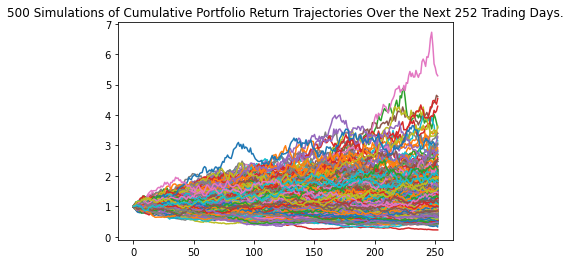

In [30]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
MC_oneyear_plot = MC_oneyear.plot_simulation()

### Calculate the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

In [36]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
daily_return = simulated_df * 10000

# Display sample data
daily_return

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,9999.847953,9988.657652,9176.666415,10672.288764
2,9993.312442,9982.292015,8836.559653,11390.191281
3,10009.727495,9991.817322,8239.858914,11514.349927
4,10020.651369,10027.561776,7955.674265,11709.691090
...,...,...,...,...
248,12913.970069,11662.514573,2241.373378,62735.081443
249,12902.934716,11638.221651,2229.156609,56816.948747
250,12929.921921,11828.618920,2231.745755,55566.441187
251,12917.590145,11795.890857,2221.276214,53584.002583


### Plot the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Profit/Losses of $10,000 in AAPL'}>

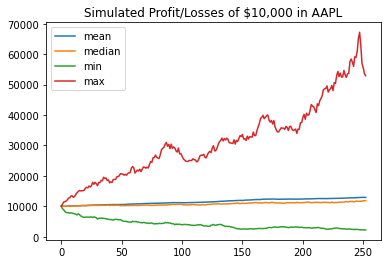

In [37]:
# Use the 'plot' function to create a chart of the simulated profits/losses
daily_return.plot(title='Simulated Profit/Losses of $10,000 in AAPL')

### Calculate the range of the possible outcomes of our $10,000 investments in `AAPL` stocks

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_oneyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.291317
std               0.676610
min               0.222604
25%               0.817307
50%               1.185817
75%               1.578601
max               5.290413
95% CI Lower      0.474025
95% CI Upper      3.032495
Name: 252, dtype: float64


In [41]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in AAPL stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $4740.25 and $30324.95.
